# Gradient Boosting All Classes

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import push_results as pr
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import confusion_matrix
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt

In [ ]:
filepath = '../data/train_test_split/scherzer/2019_all_classes/'

infile = open(filepath + 'X_train_ac.pickle','rb')
X_train = pickle.load(infile)
infile.close()

infile = open(filepath + 'X_test_ac.pickle','rb')
X_test = pickle.load(infile)
infile.close()

infile = open(filepath + 'y_train_ac.pickle','rb')
y_train = pickle.load(infile)
infile.close()

infile = open(filepath + 'y_test_ac.pickle','rb')
y_test = pickle.load(infile)
infile.close()

In [ ]:
y_train = np.array(y_train).reshape(-1, ).astype('int')
y_test = np.array(y_test).reshape(-1, ).astype('int')
# y_train_2c = np.array(y_train_2c).reshape(-1, )
# y_train_3c = np.array(y_train_3c).reshape(-1, )

## GBC for all types of pitches

In [4]:
gbc = GradientBoostingClassifier(random_state=31)

In [5]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=31, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
gbc.score(X_train, y_train)

0.6900464156781846

In [7]:
gbc.score(X_test, y_test)

0.41636582430806257

In [8]:
y_pred = gbc.predict(X_train)

In [9]:
# pr.push_results('gbc_def_v2', 'GradientBoostingClassifier', 'Default', gbc.score(X_train, y_train))

# # results_dict.update({'Gradient Boosting': gbc.score(X_train, y_train)})

## Cross validation plots

In [10]:
scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring= 'accuracy')

In [11]:
np.average(scores)

0.4306454620527984

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


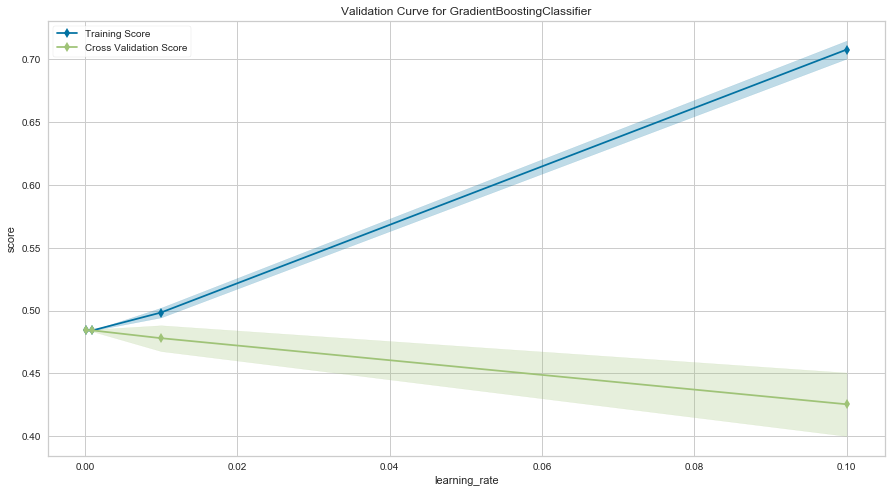

In [12]:
parameters = [.0001, .001, .01, .1]

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'learning_rate', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 10, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/learning');

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


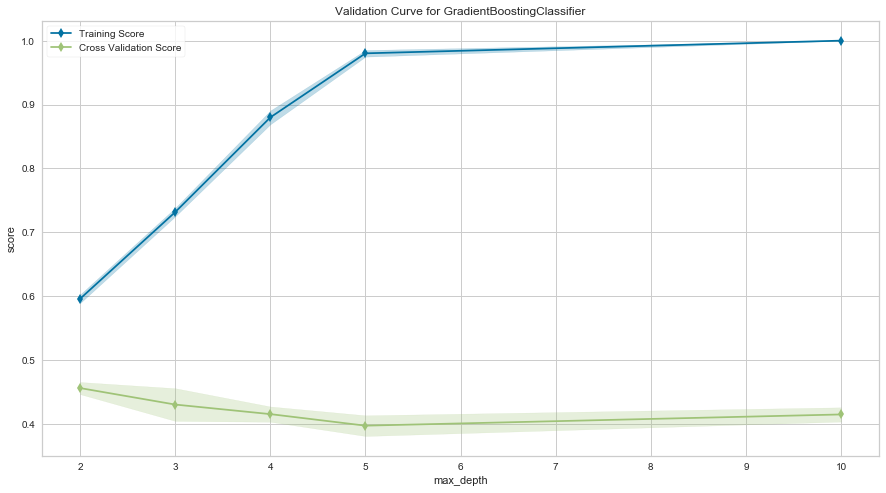

In [13]:
parameters = [2, 3, 4, 5, 10]

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'max_depth', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/max_depth');

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


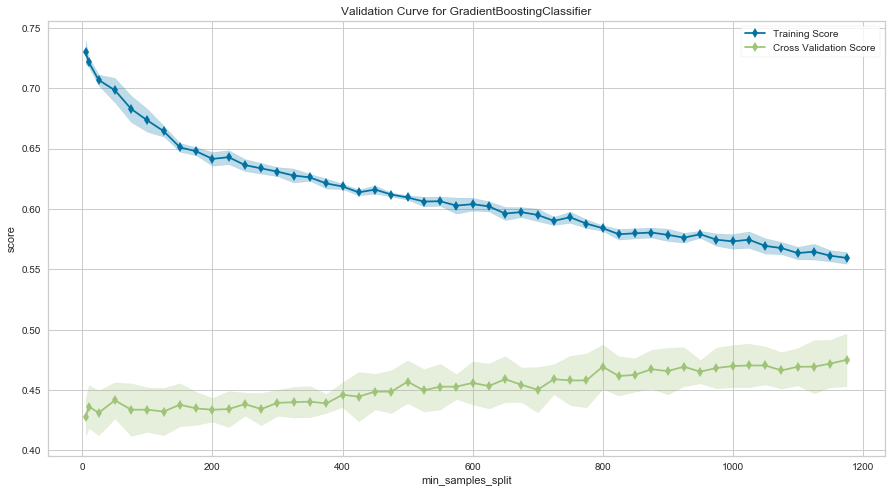

In [14]:
parameters = [5, 10] + list(range(25, 1200, 25))

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'min_samples_split', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/min_samples_split');

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


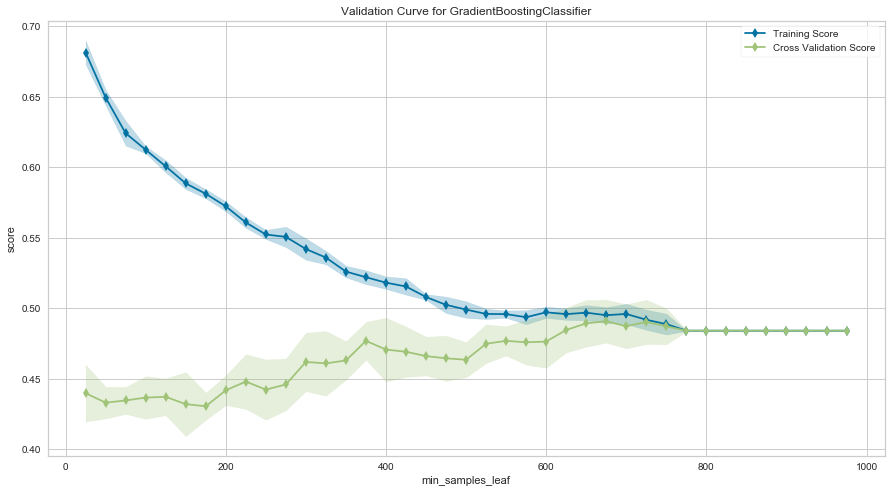

In [15]:
parameters = range(25, 1000, 25)

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'min_samples_leaf', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/min_samples_leaf');

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


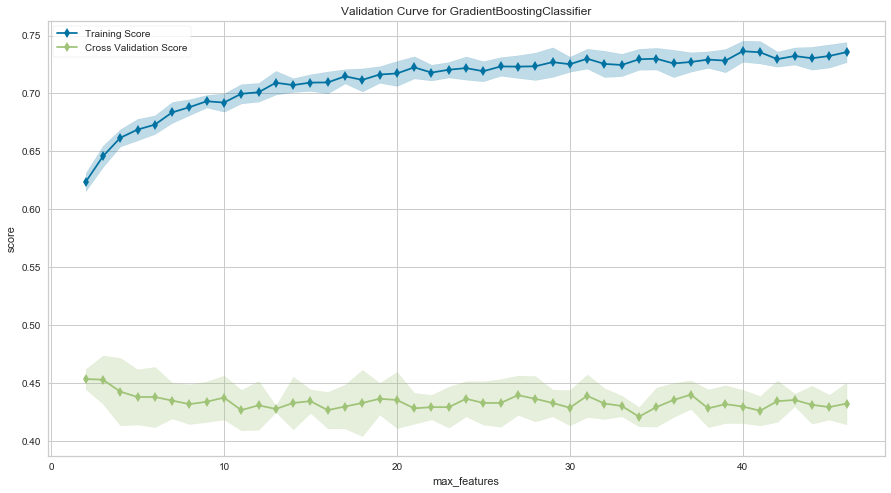

In [16]:
parameters = range(2, 47)

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'max_features', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/max_features');

In [17]:
X_train.shape[0]

1939

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


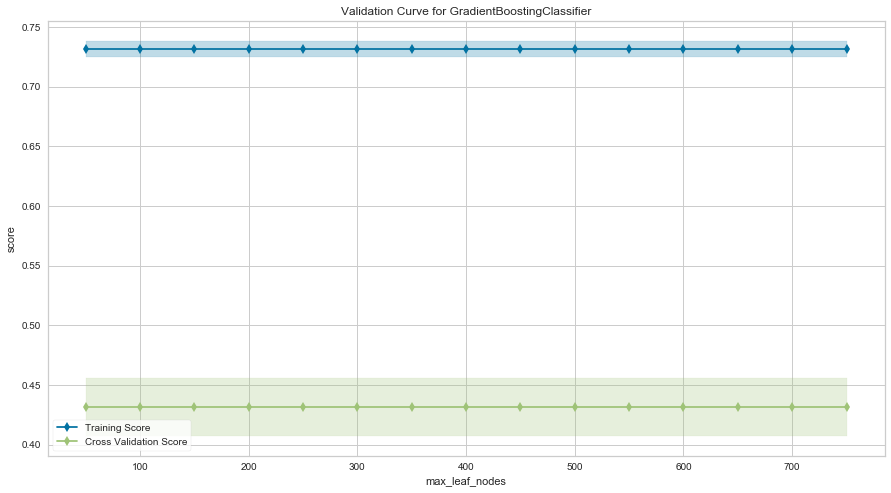

In [18]:
parameters = range(50, 800, 50)

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'max_leaf_nodes', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/max_leaf_nodes');

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


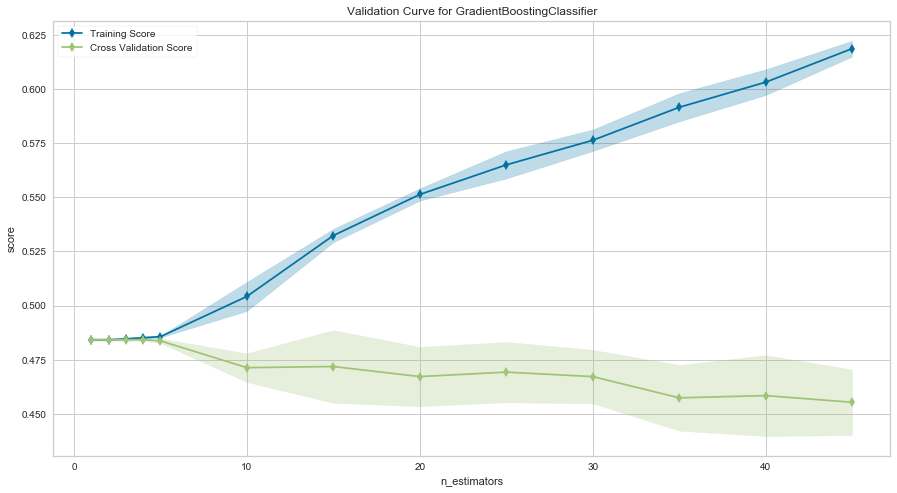

In [19]:
parameters = [1, 2, 3, 4] + list(range(5, 50, 5))

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'n_estimators', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/n_estimators');

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


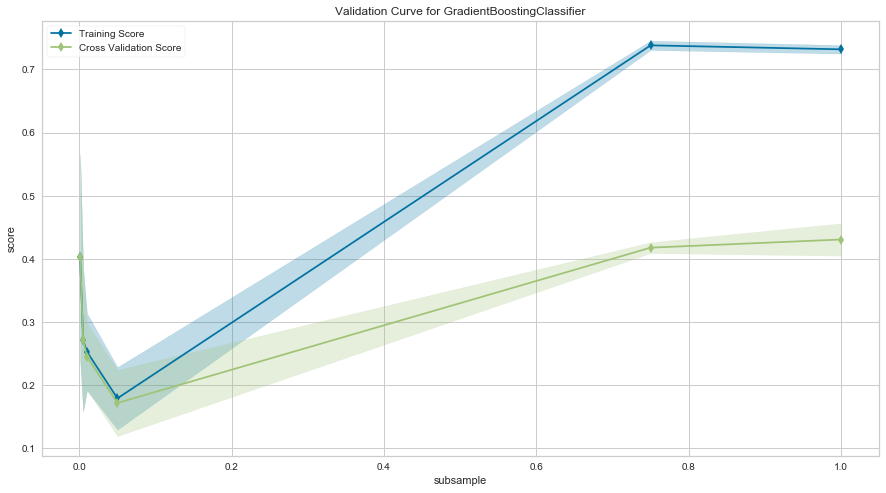

In [20]:
parameters = [.001, .005, .01, .05, .75, 1, 1.25, 1.5]

fig, ax = plt.subplots(figsize=(15, 8))

viz = ValidationCurve(model = gbc, 
                                 X = X_train,
                                 y = y_train,
                                 param_name = 'subsample', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 5, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = False 
                                )
                                             

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show(outpath = '../viz/subsample');

## Randomized Search

In [21]:
##### Tested ranges

# params = {'min_samples_split': [2, range(5, 1000, 5)]}

## Model based on analysis from yellowbrick cv graphs
# gbc2 = GradientBoostingClassifier(learning_rate=.01, 
#                                   max_depth=5, 
#                                   max_features=2, 
#                                   min_samples_leaf=775, 
#                                   min_samples_split=200, 
#                                   n_estimators=30,
#                                   subsample=.75,
#                                   random_state=31)

In [ ]:
gbc2 = GradientBoostingClassifier()

params = {'subsample': [.001, .005, .01, .05, .75, 1, 1.25, 1.5],
          'n_estimators': [1, 2, 3, 4, range(5, 50, 5)],
          'criterion': ['friedman_mse', 'mse', 'mae'], 
          'max_leaf_nodes': range(50, 800, 50),
          'max_features': range(2, 47), 
          'learning_rate': [.0001, .001, .01, .1], 
          'max_depth': [2, 3, 4, 5, 10], 
          'min_samples_leaf': range(25, 1000, 25), 
          'min_samples_split': [2, 5, 10, range(25, 1200, 25)]}

rs = RandomizedSearchCV(gbc2, params, n_jobs=-1, random_state=31, cv=5, verbose = 1, n_iter=10000, refit=True)

rs.fit(X_train, y_train);

rs.best_params_, rs.score(X_train, y_train), rs.score(X_test, y_test)

In [ ]:
rs_cm = ConfusionMatrix(rs, classes=['Fastball', 'Cutter', 'Slider', 'Curve', 'Changeup'])

rs_cm.fit(X_train, y_train)
rs_cm.score(X_test, y_test)

rs_cm.show(outpath = '../viz/rs_matrix');

In [24]:
gbcb = GradientBoostingClassifier(subsample=0.001, 
                                  n_estimators=3, min_samples_leaf=425, max_leaf_nodes=150, 
                                  min_samples_split= 5,
                                  max_features=16, 
                                  max_depth=2, 
                                  learning_rate = 0.0001,
                                  criterion ='mse', 
                                  random_state=31)

In [25]:
gbcb.fit(X_train, y_train);

In [26]:
gbcb.score(X_train, y_train)

0.48427024239298605

In [27]:
gbcb.score(X_test, y_test)

0.48375451263537905

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


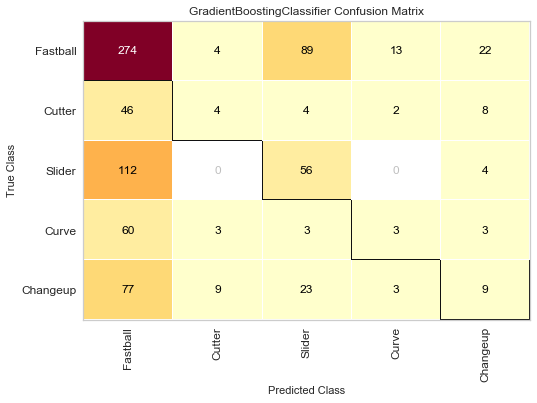

In [28]:
iris_cm = ConfusionMatrix(gbc, classes=['Fastball', 'Cutter', 'Slider', 'Curve', 'Changeup'])

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.show(outpath = '../viz/default_matrix');

## Model validation
Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [30]:
# Binarize the output
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_train.shape[1]

In [31]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(gbc)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [32]:
# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=31))

# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [33]:
classifier.score(X_train, y_train)

0.39453326456936566

In [34]:
classifier.score(X_test, y_test)

0.19133574007220217

In [35]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [36]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<Figure size 576x396 with 0 Axes>

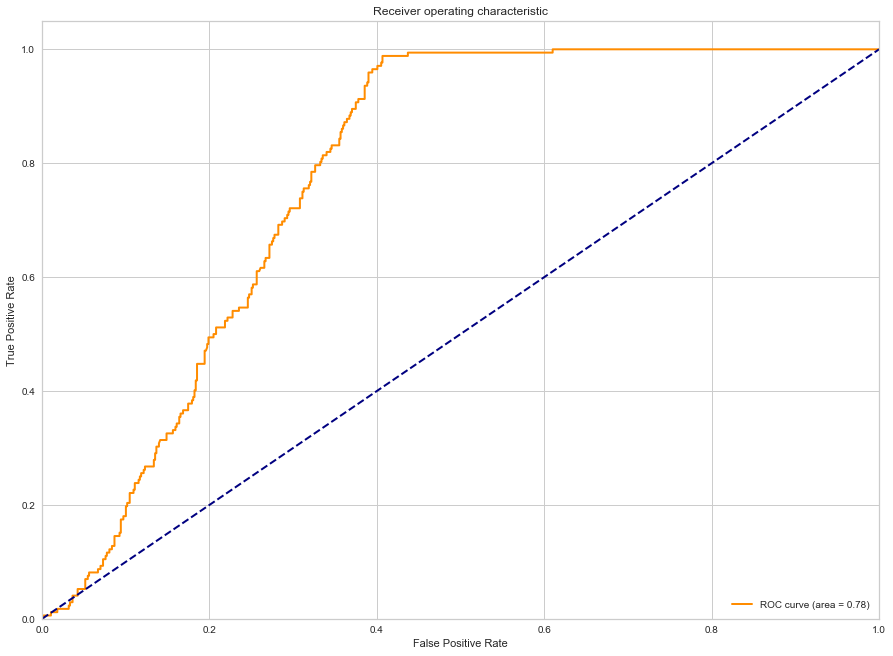

In [37]:
plt.figure()
plt.figure(figsize=(15,11))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('../viz/roc_one_vs_rest.png')
plt.show()

## Multiclass ROC

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


<Figure size 576x396 with 0 Axes>

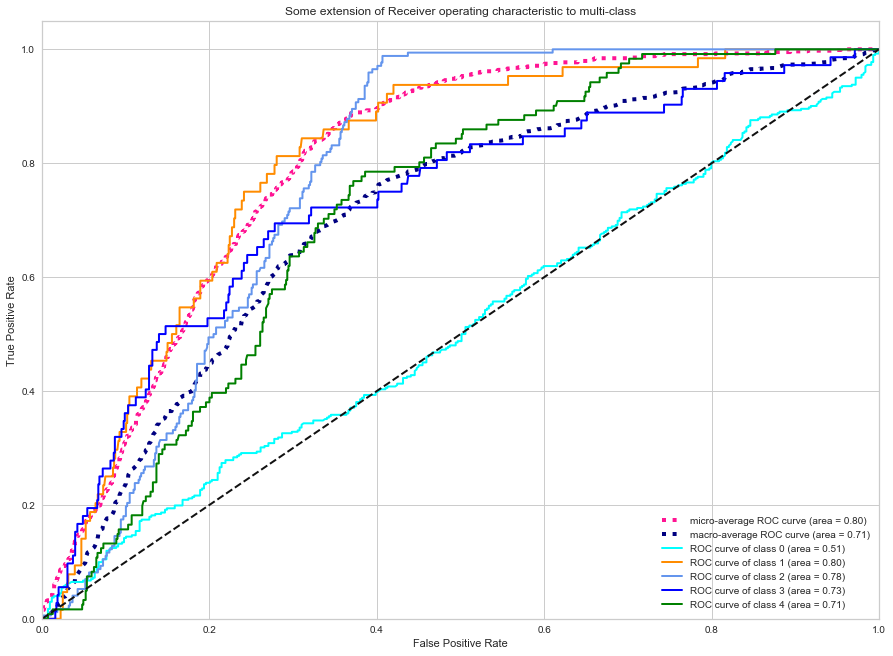

In [38]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize=(15,11))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.savefig('../viz/roc_mc.png')
plt.show()

## Try MLPClassifier

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
clf = MLPClassifier(random_state=31, max_iter=10000, hidden_layer_sizes=(500,))
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)
# clf.predict_proba(X_test[:1])

# clf.predict(X_test[:5, :])



(0.9345023207839093, 0.2743682310469314)

In [41]:
params = {'hidden_layer_sizes': [(100,), (200,), (300,), (500,), (1000,)],
          'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'solver': ['lbfgs', 'sgd', 'adam'],
          'alpha': [0.0001, .001, .01, 1],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'learning_rate_init': [0.001, 0.01, .1, 1]}

rsmlp = RandomizedSearchCV(estimator = clf, 
                           param_distributions = params, 
                           n_iter = 5000, 
                           n_jobs = -1, 
                           cv = 5, 
                           verbose = 1)

In [42]:
rsmlp.fit(X_train, y_train);
rsmlp.score(X_train, y_train)

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2880 is smaller than n_iter=5000. Running 2880 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.0s
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 55.9min
exception calling callback for <Future at 0x7f90603d3390 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __cal

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [ ]:
rsmlp.best_params_

In [ ]:
rsmlp.score(X_test, y_test)

In [ ]:
rsmlp.classes_

In [ ]:
rsmlp.error_score

In [ ]:
rsmlp.predict_proba(X_test)

In [ ]:
y_test